<h1> LA Metro Transit Consolidation: Bus & Rail

**By**: Andrew Williams

**Partner:** Ben Brassette

**Description:** The purpose of this notebook to consolidate LA metro bus and rail lines. Most of this notebook will involve diving into diffenent datasets and ensuring it can be used with other datasets in the future. No in-depth analysis of the data yet. 

Notes: Restating issues here for quick review during group work or office hours.
1. Query search for "None"
2. Map plotting and bus lines the same color
3. Context maps
4. Rail lines, rail stops, bus stops, bus lines. 

<h2> Importing Libraries and Datasets

Importing libraries for gpd, plotting, and basepamps.

In [2]:
import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as ctx

import folium

Import was successful. I can now plot by shapefiles on a context map.I'm unsure if I'll need the mathplotlib at this point, but included just in case I want to add graphs, charts, or other figures.

Importing a long line of shape files from LA Metro-- Better yet, I found a combined a LA bus routes shapefile coutesy of LA GeoHub. 

In [3]:
rail_lines = gpd.read_file('Data/RailStations0715/Stations_All_0715.shp')

mbus_lines = gpd.read_file('Data/metro_bus_lines/Metro_Bus_Lines.shp')

Shape files are ready for exploration now. 

<h2> Metro Bus Lines

Ensuring datatype

In [4]:
type(mbus_lines)

geopandas.geodataframe.GeoDataFrame

bmus_line is a gpd.

I want to see the kinds of data within this dataset

In [5]:
mbus_lines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    811 non-null    int64   
 1   VAR_ROUTE   786 non-null    object  
 2   VAR_IDENT   809 non-null    object  
 3   VAR_DESCR   807 non-null    object  
 4   VAR_DIREC   811 non-null    int64   
 5   MetroCateg  811 non-null    object  
 6   MetroBusTy  811 non-null    object  
 7   RouteNumbe  811 non-null    int64   
 8   RouteName   811 non-null    object  
 9   TOOLTIP     811 non-null    object  
 10  NLA_URL     811 non-null    object  
 11  geometry    810 non-null    geometry
dtypes: geometry(1), int64(3), object(8)
memory usage: 76.2+ KB


It appears I have a few strings, one geo, and the rest are intergers. No floats. 

I want to see the size of my dataset (rows and columns)

In [6]:
mbus_lines.shape

(811, 12)

No surprises here, list is expanisve given it contains all of LA metro's bus lines. 

Scoping out the head and tails of my data to see what the actual values are in my dataset.

In [7]:
mbus_lines.head()

,OBJECTID,VAR_ROUTE,VAR_IDENT,VAR_DESCR,VAR_DIREC,MetroCateg,MetroBusTy,RouteNumbe,RouteName,TOOLTIP,NLA_URL,geometry
0,1,60,N1,END TO END,0,ComCirc,Metro Shuttles and Circulators,603,603 Glendale-Grand Sta Via San Fernando-Rampar...,603 Glendale-Grand Sta Via San Fernando-Rampar...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26462 34.03322, -118.26432 34..."
1,2,60,S1,END TO END,1,ComCirc,Metro Shuttles and Circulators,603,603 Glendale-Grand Sta Via San Fernando-Rampar...,603 Glendale-Grand Sta Via San Fernando-Rampar...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26088 34.14528, -118.26088 34..."
2,3,60,N1,END TO END,0,ComCirc,Metro Shuttles and Circulators,605,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.21045 34.01992, -118.21046 34..."
3,4,60,S1,END TO END,1,ComCirc,Metro Shuttles and Circulators,605,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.20655 34.05874, -118.20655 34..."
4,5,60,A2,New Clockwise Loop,8,ComCirc,Metro Shuttles and Circulators,607,607 Windsor Hills - Inglewood Shuttle,607 Windsor Hills - Inglewood Shuttle\nType: M...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.35281 33.95983, -118.35282 33..."


Tons of useful information on metro bus routes. I will eventually want to seperate the MetroCateg so I can plot different bus line systems.

I would like to see my bus lines

In [8]:
mbus_lines['VAR_ROUTE'].value_counts()

16     54
15     43
23     43
7      36
5      34
3      33
9      30
1      30
21     30
11     29
26     28
20     27
8      26
6      23
10     23
24     22
4      21
25     21
22     18
2      16
12     14
18     12
75     12
72     11
19     10
70     10
74      9
17      8
76      8
48      8
29      8
68      7
71      6
73      6
62      6
60      5
53      5
46      5
61      4
90      4
78      4
91      4
44      4
64      4
77      3
66      3
34      3
55      3
27      3
45      2
79      2
901     2
57      2
13      2
Name: VAR_ROUTE, dtype: int64

Bus route numbers. Wondering what the difference between VAR_ROUTE and RouteNumbe.

I want to see if the metrocatego encompasses all the bus lines as described by LA Metro. Otherwise, I will have to upload missing bus line systems

In [9]:
mbus_lines['MetroCateg'].value_counts()

LocalNonCBD    395
LocalCBD       274
RapidBRT        81
LimExp          32
ComCirc         29
Name: MetroCateg, dtype: int64

Fantastic. This list has all 5 bus line systems that have corresponding shapefiles on LA Metro's website. 

Quick plot to see bus system appatarus.

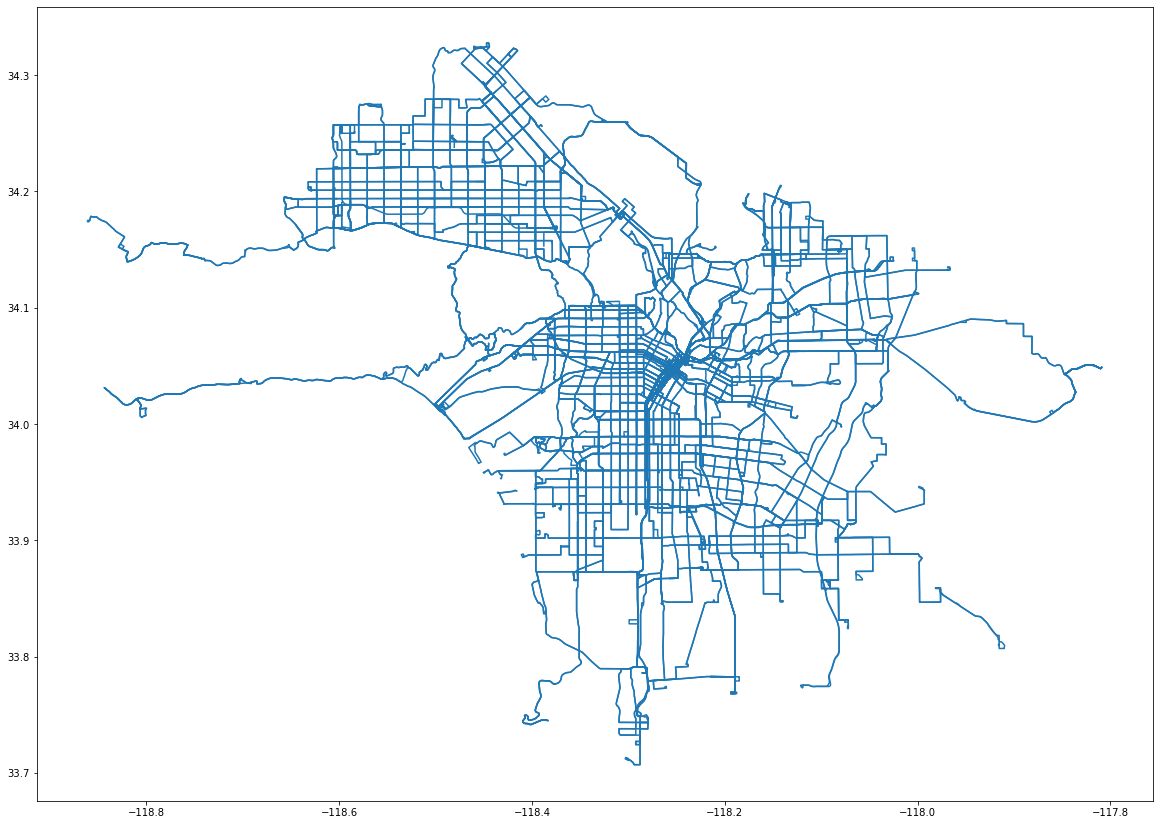

In [10]:
mbus_lines.plot(figsize=(20,15))

LA Metro bus sytem seems widespread. Will be beneficial to create sub-datasets for each type of bus (cbd, non cbd, etc.)

<h2> Local CBD Bus Lines

A couple steps in one since I'm doing this for five different subcomponents for this dataset.

In [11]:
#pulling subset of data from mbus_lines-- the local CBD routes and creating a variable
local_cbd = mbus_lines[mbus_lines.MetroCateg == 'LocalCBD']
#testing new variable
local_cbd

,OBJECTID,VAR_ROUTE,VAR_IDENT,VAR_DESCR,VAR_DIREC,MetroCateg,MetroBusTy,RouteNumbe,RouteName,TOOLTIP,NLA_URL,geometry
61,62,None,E05,Short Line at GLEMNT,2,LocalCBD,Metro Local and Limited,2,2 Downtown LA - Pacific Palisades Via Sunset Bl,2 Downtown LA - Pacific Palisades Via Sunset B...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.29122 34.09816, -118.28955 34..."
62,63,None,E1,End-End Local June 2001,2,LocalCBD,Metro Local and Limited,2,2 Downtown LA - Pacific Palisades Via Sunset Bl,2 Downtown LA - Pacific Palisades Via Sunset B...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.55443 34.03980, -118.55439 34..."
63,64,None,E10,LTD TO GLEMNT,2,LocalCBD,Metro Local and Limited,2,2 Downtown LA - Pacific Palisades Via Sunset Bl,2 Downtown LA - Pacific Palisades Via Sunset B...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.41233 34.08134, -118.41197 34..."
64,65,None,E2,End-End LTD June 2001,2,LocalCBD,Metro Local and Limited,2,2 Downtown LA - Pacific Palisades Via Sunset Bl,2 Downtown LA - Pacific Palisades Via Sunset B...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.41233 34.08134, -118.41197 34..."
65,66,None,E3,UCLA,2,LocalCBD,Metro Local and Limited,2,2 Downtown LA - Pacific Palisades Via Sunset Bl,2 Downtown LA - Pacific Palisades Via Sunset B...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.44485 34.06915, -118.44483 34..."
...,...,...,...,...,...,...,...,...,...,...,...,...
330,331,9,S4,From SYLMET,1,LocalCBD,Metro Local and Limited,94,94 Downtown LA - Sun Valley Via San Fernando Rd,94 Downtown LA - Sun Valley Via San Fernando R...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.45079 34.29347, -118.45080 34..."
331,332,9,N1,END TO END VIA ZOO & MTL,0,LocalCBD,Metro Local and Limited,96,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr\nTy...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26462 34.03322, -118.26432 34..."
332,333,9,N2,BYPASS L.A. ZOO,0,LocalCBD,Metro Local and Limited,96,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr\nTy...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.27163 34.11687, -118.27171 34..."
333,334,9,S1,END TO END VIA ZOO,1,LocalCBD,Metro Local and Limited,96,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr,96 Dtwn LA- Burbank Sta Via Griffith Pk Dr\nTy...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.31281 34.17933, -118.31192 34..."


New local cbd bus variable created. 

I want to compare VAR_ROUTES and RouteNumbe, will do a value count for each.

In [12]:
local_cbd['VAR_ROUTE'].value_counts()

7    36
5    34
3    33
9    30
1    30
8    26
6    23
4    21
2    16
Name: VAR_ROUTE, dtype: int64

In [13]:
local_cbd['RouteNumbe'].value_counts()

2     22
78    18
51    16
84    13
90    12
30    12
35    12
40    11
45    10
55    10
16     9
92     9
33     9
62     9
60     9
28     9
14     8
53     8
76     7
20     7
81     7
10     7
70     6
18     6
83     6
94     5
66     5
71     5
96     4
4      3
Name: RouteNumbe, dtype: int64

I need to reach out to someone who knows what these variables actually stand for. Google searches have not been helpful.There is some crossover, but some missing gaps as well. 

Will try a loc or query to find all the "None" values.

In [14]:
local_cbd.loc[local_cbd['VAR_ROUTE'] == 'None']
local_cbd.query("VAR_ROUTE == 'None'")

,OBJECTID,VAR_ROUTE,VAR_IDENT,VAR_DESCR,VAR_DIREC,MetroCateg,MetroBusTy,RouteNumbe,RouteName,TOOLTIP,NLA_URL,geometry


**I'm doing something wrong here. Will need to address later or during office hours.**

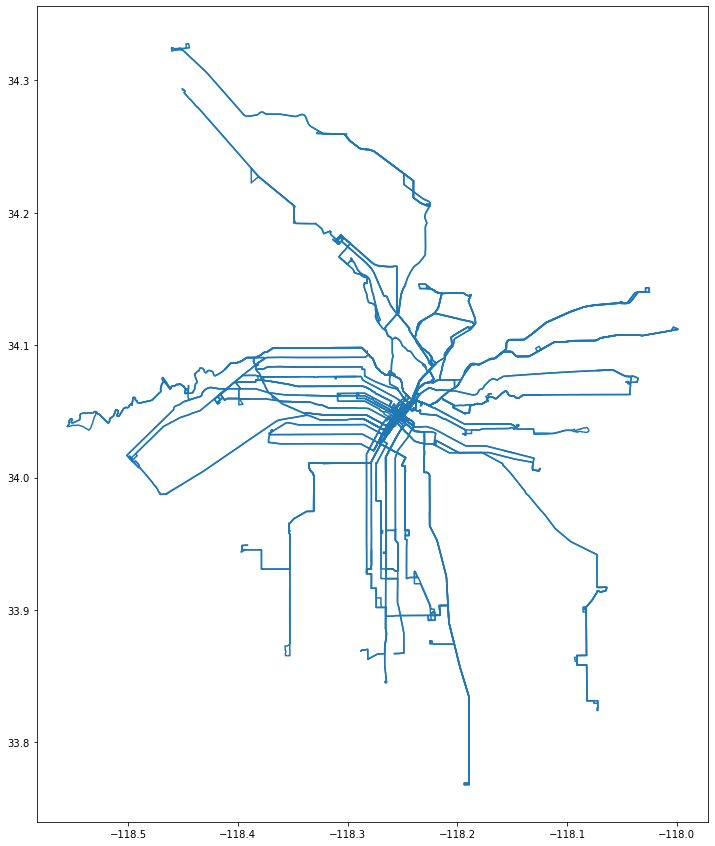

In [15]:
local_cbd.plot(figsize=(20,15))

Local cbd bus routes. This sytem of routes stretches all over LA County. I thought it would be more condensed in the downtown area. Curious how neighborhood populations will overlay on this.

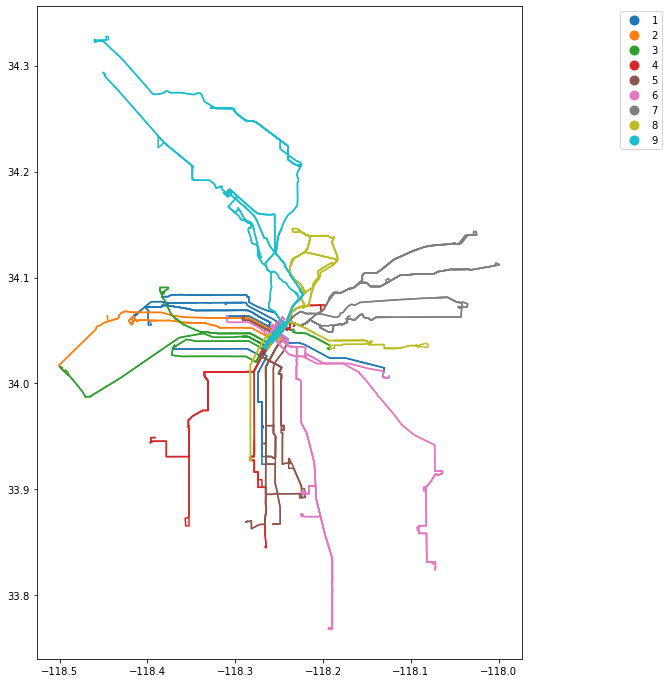

In [16]:
local_cbd.plot(
            figsize=(20,12),   
            column = 'VAR_ROUTE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
) 

<h2> Local Non CBD Bus Lines

Creating and defining local non cbd variable by pulling a subset of data from the mbus_lines gdf. 

In [17]:
#pulling subset of data from mbus_lines-- the local non CBD routes and creating a variable
local_n_cbd = mbus_lines[mbus_lines.MetroCateg == 'LocalNonCBD']
#testing new variable
local_n_cbd

,OBJECTID,VAR_ROUTE,VAR_IDENT,VAR_DESCR,VAR_DIREC,MetroCateg,MetroBusTy,RouteNumbe,RouteName,TOOLTIP,NLA_URL,geometry
335,336,10,E1,END TO END_WESEXP,2,LocalNonCBD,Metro Local and Limited,102,102 LAX Cty Bus Ctr - S Gate Via LA Tijera-Exp...,102 LAX Cty Bus Ctr - S Gate Via LA Tijera-Exp...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.39188 33.94907, -118.39265 33..."
336,337,10,E2,OWL STOCKER,2,LocalNonCBD,Metro Local and Limited,102,102 LAX Cty Bus Ctr - S Gate Via LA Tijera-Exp...,102 LAX Cty Bus Ctr - S Gate Via LA Tijera-Exp...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.33542 34.00836, -118.33526 34..."
337,338,10,E3,SHORT LINE FIG31O,2,LocalNonCBD,Metro Local and Limited,102,102 LAX Cty Bus Ctr - S Gate Via LA Tijera-Exp...,102 LAX Cty Bus Ctr - S Gate Via LA Tijera-Exp...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.30858 34.01825, -118.30836 34..."
338,339,10,E4,OWL STOCKER,2,LocalNonCBD,Metro Local and Limited,102,102 LAX Cty Bus Ctr - S Gate Via LA Tijera-Exp...,102 LAX Cty Bus Ctr - S Gate Via LA Tijera-Exp...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.39586 33.94877, -118.39609 33..."
339,340,10,W1,END TO END_WESEXP,3,LocalNonCBD,Metro Local and Limited,102,102 LAX Cty Bus Ctr - S Gate Via LA Tijera-Exp...,102 LAX Cty Bus Ctr - S Gate Via LA Tijera-Exp...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.22305 33.96347, -118.22299 33..."
...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,29,N5,OLISAN HYBRID TRIPS,0,LocalNonCBD,Metro Local and Limited,292,292 Sylmar Sta-Burbank Sta Via Glenoaks Bl,292 Sylmar Sta-Burbank Sta Via Glenoaks Bl\nTy...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.30858 34.18098, -118.30871 34..."
726,727,29,S1,SYLMET TO FROMET,1,LocalNonCBD,Metro Local and Limited,292,292 Sylmar Sta-Burbank Sta Via Glenoaks Bl,292 Sylmar Sta-Burbank Sta Via Glenoaks Bl\nTy...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.45079 34.29347, -118.45080 34..."
727,728,29,S2,SYLMET TO HUBGLE,1,LocalNonCBD,Metro Local and Limited,292,292 Sylmar Sta-Burbank Sta Via Glenoaks Bl,292 Sylmar Sta-Burbank Sta Via Glenoaks Bl\nTy...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.45079 34.29347, -118.45080 34..."
728,729,29,S5,OLISAN HYBRID TRIPS,1,LocalNonCBD,Metro Local and Limited,292,292 Sylmar Sta-Burbank Sta Via Glenoaks Bl,292 Sylmar Sta-Burbank Sta Via Glenoaks Bl\nTy...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.36673 34.23014, -118.36662 34..."


Success, have my local non cbd buses. Will want to do a quick few steps to check out this subset.

In [18]:
local_n_cbd['VAR_ROUTE'].value_counts()

16    54
15    43
23    43
21    30
11    29
26    28
20    27
10    23
24    22
25    21
22    18
12    14
18    12
19    10
29     8
17     8
27     3
13     2
Name: VAR_ROUTE, dtype: int64

In [19]:
local_n_cbd['RouteNumbe'].value_counts()

152    14
245    13
150    13
224    12
169    12
       ..
130     2
265     2
258     2
154     2
202     2
Name: RouteNumbe, Length: 69, dtype: int64

Have a list of buses on this route, with the note of checking out the differences between the two above columns. 

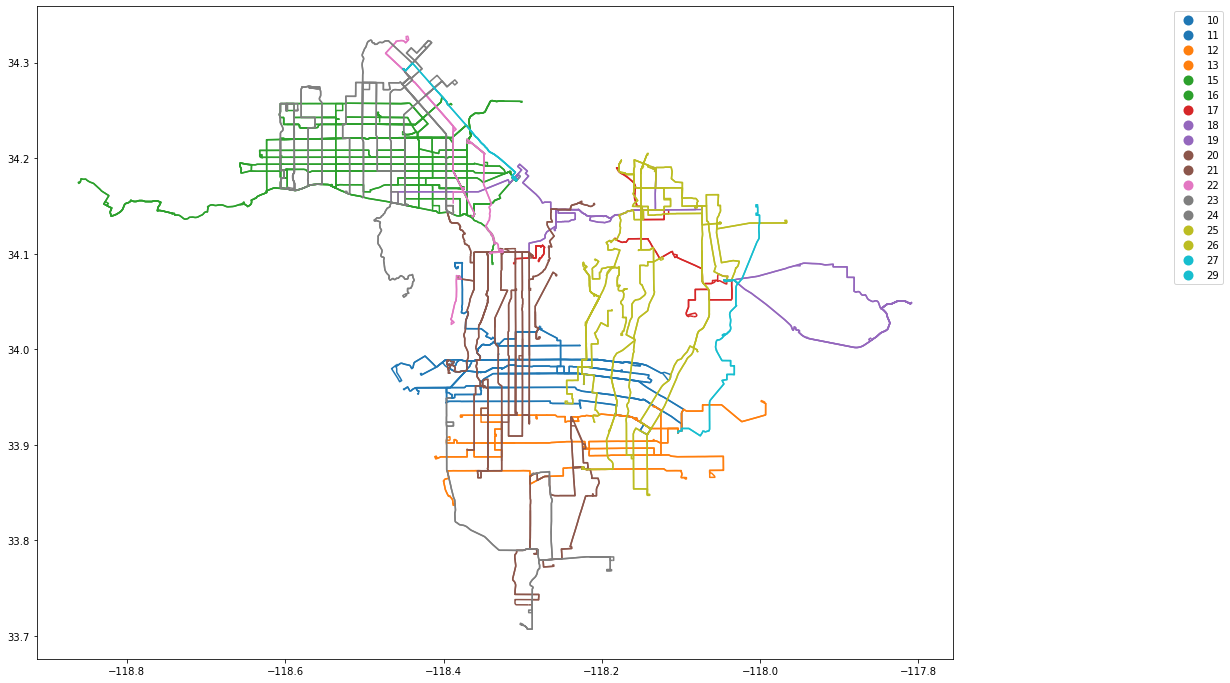

In [20]:
local_n_cbd.plot(
            figsize=(20,12),   
            column = 'VAR_ROUTE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
) 

Map of local non cbd buses. **Note that several buses have the same color, will need to figure out how to seperate those bus line.**

<h2> Metro Limited or Express Lines (Lines 344 through 577 and 788

Reminder of bus nomenclature.

In [21]:
mbus_lines['MetroCateg'].value_counts()

LocalNonCBD    395
LocalCBD       274
RapidBRT        81
LimExp          32
ComCirc         29
Name: MetroCateg, dtype: int64

Will be using LimExp for this dataset. 

In [22]:
#pulling subset of data from mbus_lines-- the metro limited/expressway lines and creating a variable
lim_exp = mbus_lines[mbus_lines.MetroCateg == 'LimExp']
#testing new variable
lim_exp

,OBJECTID,VAR_ROUTE,VAR_IDENT,VAR_DESCR,VAR_DIREC,MetroCateg,MetroBusTy,RouteNumbe,RouteName,TOOLTIP,NLA_URL,geometry
29,30,34,N1,END TO END,0,LimExp,Metro Local and Limited,344,344 Harbor Gateway Tc - Palos Verdes Via Hawth...,344 Harbor Gateway Tc - Palos Verdes Via Hawth...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.38388 33.74491, -118.38378 33..."
30,31,34,N2,From PVWHAO,0,LimExp,Metro Local and Limited,344,344 Harbor Gateway Tc - Palos Verdes Via Hawth...,344 Harbor Gateway Tc - Palos Verdes Via Hawth...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.40729 33.74867, -118.40730 33..."
31,32,34,S1,END TO END,1,LimExp,Metro Local and Limited,344,344 Harbor Gateway Tc - Palos Verdes Via Hawth...,344 Harbor Gateway Tc - Palos Verdes Via Hawth...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.28729 33.86932, -118.28798 33..."
32,33,44,N1,END TO END,0,LimExp,Metro Express,442,442 Downtown LA - Hawthorne/Lennox Sta- Via Ma...,442 Downtown LA - Hawthorne/Lennox Sta- Via Ma...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.35261 33.93230, -118.35261 33..."
33,34,44,N2,PATSAURAS,0,LimExp,Metro Express,442,442 Downtown LA - Hawthorne/Lennox Sta- Via Ma...,442 Downtown LA - Hawthorne/Lennox Sta- Via Ma...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.25717 34.04998, -118.25636 34..."
34,35,44,S1,END TO END,1,LimExp,Metro Express,442,442 Downtown LA - Hawthorne/Lennox Sta- Via Ma...,442 Downtown LA - Hawthorne/Lennox Sta- Via Ma...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.23251 34.05508, -118.23296 34..."
35,36,44,N1,END TO END,0,LimExp,Metro Express,442,442 Downtown LA - Hawthorne/Lennox Sta- Via Ma...,442 Downtown LA - Hawthorne/Lennox Sta- Via Ma...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.23251 34.05508, -118.23296 34..."
36,37,45,N1,END TO END,0,LimExp,Metro Express,450,450 Downtown LA - San Pedro Via Harbor Transitway,450 Downtown LA - San Pedro Via Harbor Transit...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.28799 33.72494, -118.28799 33..."
37,38,45,S1,END TO END,1,LimExp,Metro Express,450,450 Downtown LA - San Pedro Via Harbor Transitway,450 Downtown LA - San Pedro Via Harbor Transit...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.25885 34.05410, -118.25837 34..."
38,39,46,N1,END TO END,3,LimExp,Metro Express,460,460 Downtown LA - Disneyland Via Harbor Tway-1...,460 Downtown LA - Disneyland Via Harbor Tway-1...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-117.91597 33.81037, -117.91597 33..."


Much shorter list compated to the other subsets, but makes sense given I don't limited and expressway buses to be in great quantity.

I want to check out the bus lines on this bus system.

In [23]:
lim_exp['VAR_ROUTE'].value_counts()

48    8
46    5
53    5
44    4
34    3
55    3
45    2
57    2
Name: VAR_ROUTE, dtype: int64

Have my list of var counts. 

Mapping my list of var counts.

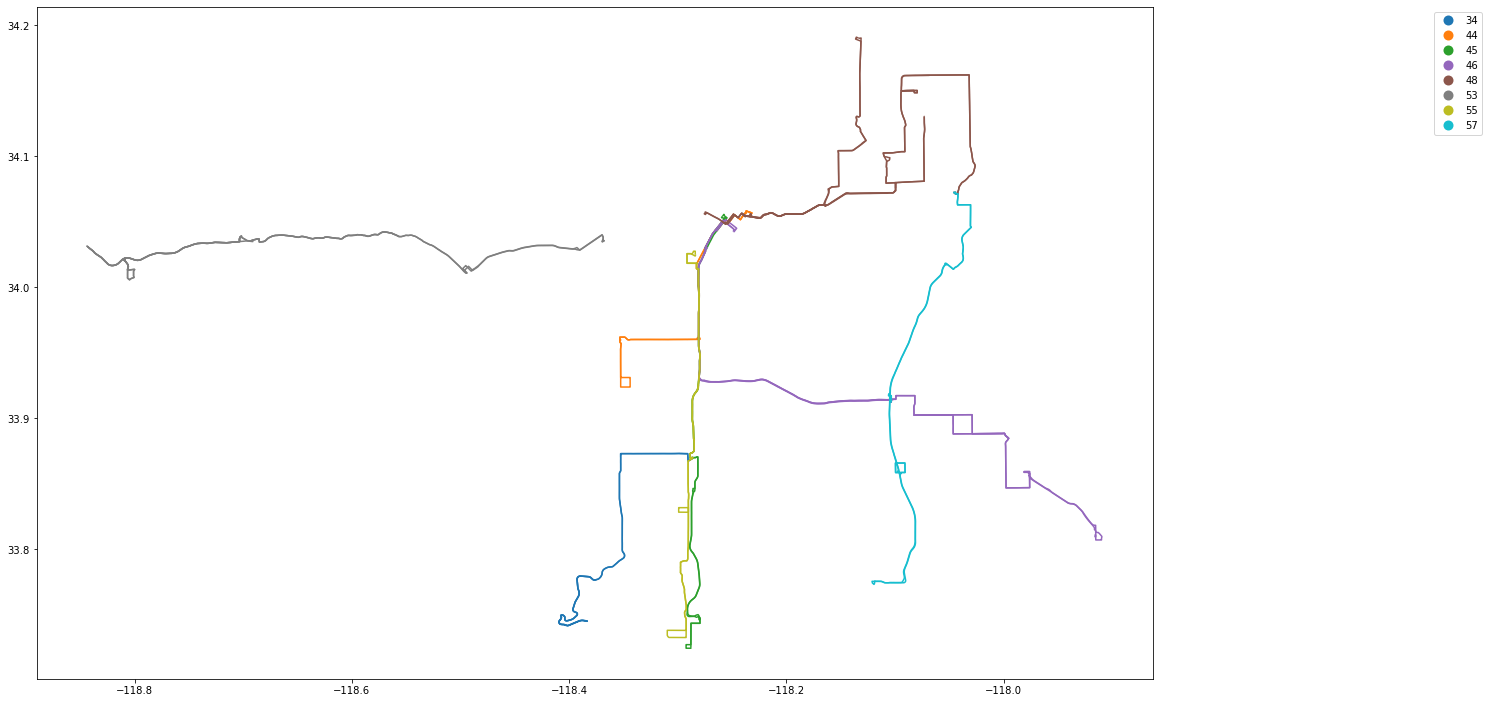

In [24]:
lim_exp.plot(
            figsize=(20,15),   
            column = 'VAR_ROUTE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
) 

Bus routes for lim_exp. I would like to plot rapid brt along these to see coverage area.

<h2>Metro Community Circulator Lines (Lines 603 through 687)

In [25]:
#pulling subset of data from mbus_lines-- the metro comm cir routes and creating a variable
com_cir = mbus_lines[mbus_lines.MetroCateg == 'ComCirc']
#testing new variable
com_cir

,OBJECTID,VAR_ROUTE,VAR_IDENT,VAR_DESCR,VAR_DIREC,MetroCateg,MetroBusTy,RouteNumbe,RouteName,TOOLTIP,NLA_URL,geometry
0,1,60,N1,END TO END,0,ComCirc,Metro Shuttles and Circulators,603,603 Glendale-Grand Sta Via San Fernando-Rampar...,603 Glendale-Grand Sta Via San Fernando-Rampar...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26462 34.03322, -118.26432 34..."
1,2,60,S1,END TO END,1,ComCirc,Metro Shuttles and Circulators,603,603 Glendale-Grand Sta Via San Fernando-Rampar...,603 Glendale-Grand Sta Via San Fernando-Rampar...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26088 34.14528, -118.26088 34..."
2,3,60,N1,END TO END,0,ComCirc,Metro Shuttles and Circulators,605,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.21045 34.01992, -118.21046 34..."
3,4,60,S1,END TO END,1,ComCirc,Metro Shuttles and Circulators,605,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.20655 34.05874, -118.20655 34..."
4,5,60,A2,New Clockwise Loop,8,ComCirc,Metro Shuttles and Circulators,607,607 Windsor Hills - Inglewood Shuttle,607 Windsor Hills - Inglewood Shuttle\nType: M...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.35281 33.95983, -118.35282 33..."
5,6,61,E1,CLOCKWISE,8,ComCirc,Metro Shuttles and Circulators,611,611 Huntington Park Shuttle,611 Huntington Park Shuttle\nType: Metro Shutt...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.18423 33.95838, -118.18231 33..."
6,7,61,W1,COUNTER CLOCKWISE,9,ComCirc,Metro Shuttles and Circulators,611,611 Huntington Park Shuttle,611 Huntington Park Shuttle\nType: Metro Shutt...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.18423 33.95838, -118.18231 33..."
7,8,61,CO,END TO END,9,ComCirc,Metro Shuttles and Circulators,612,612 South Gate Shuttle,612 South Gate Shuttle\nType: Metro Shuttles a...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.23806 33.92843, -118.23613 33..."
8,9,61,S2,END TO END,8,ComCirc,Metro Shuttles and Circulators,612,612 South Gate Shuttle,612 South Gate Shuttle\nType: Metro Shuttles a...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.23806 33.92843, -118.23613 33..."
9,10,62,C1,End to End Via Indiana Station,9,ComCirc,Metro Shuttles and Circulators,620,620 Boyle Heights Shuttle,620 Boyle Heights Shuttle\nType: Metro Shuttle...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.21376 34.06110, -118.21362 34..."


Vairbale created and nothing looks out of the ordinary.

Trying an alternative to list VAR_ROUTES variables. 

In [26]:
com_cir['VAR_ROUTE']

0     60
1     60
2     60
3     60
4     60
5     61
6     61
7     61
8     61
9     62
10    62
11    62
12    62
13    62
14    62
15    64
16    64
17    64
18    64
19    66
20    66
21    66
22    68
23    68
24    68
25    68
26    68
27    68
28    68
Name: VAR_ROUTE, dtype: object

Lists of the different var_routes.

Given frequency of some of the above numbers, will do a value count.

In [27]:
com_cir['VAR_ROUTE'].value_counts()

68    7
62    6
60    5
64    4
61    4
66    3
Name: VAR_ROUTE, dtype: int64

Limited subset of routes, will not run into issues with map plotting. 

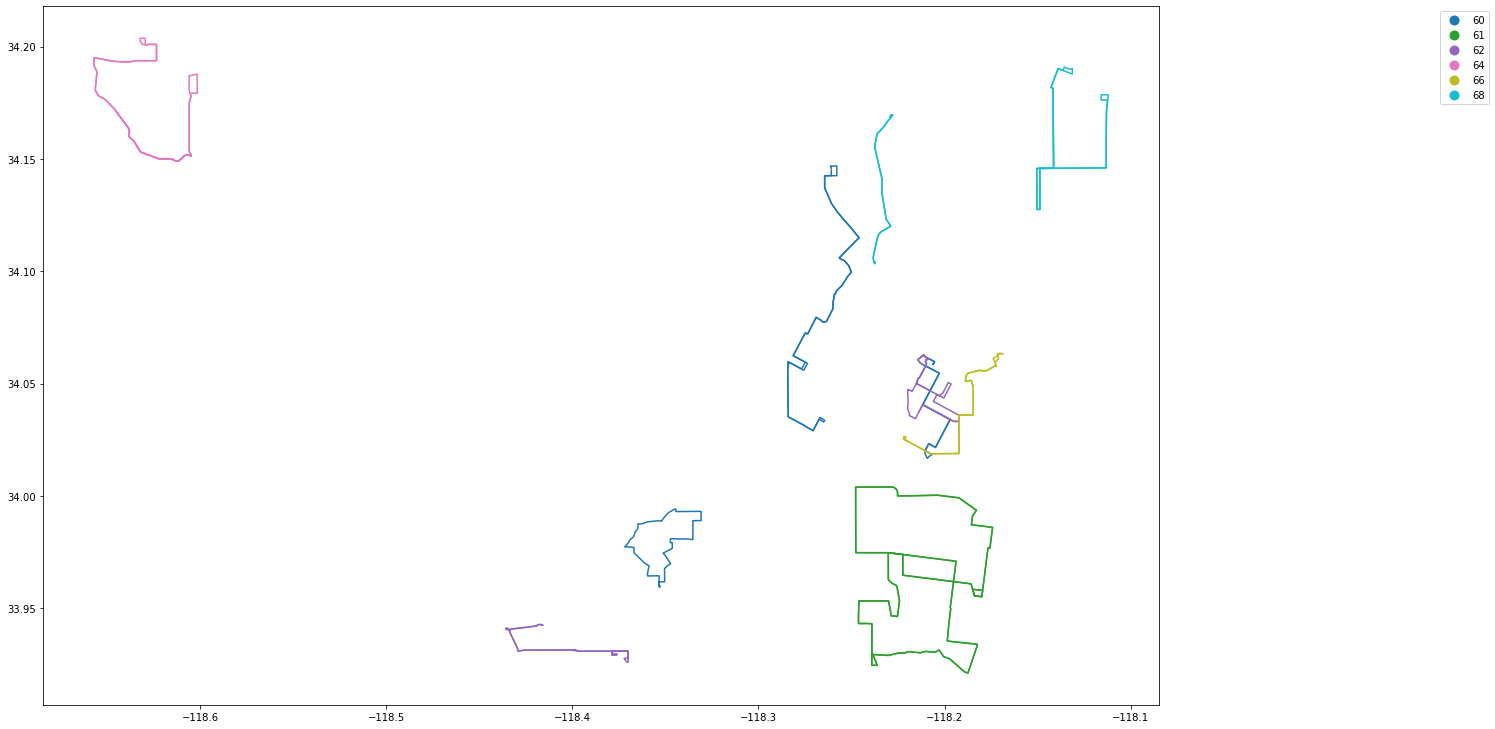

In [28]:
com_cir.plot(
            figsize=(20,15),   
            column = 'VAR_ROUTE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
) 

Neighborhood/sub-regional focus. I would like to plot several of these bus maps together to see connectivity. 

<h2> Rapid BRT

In [29]:
#pulling subset of data from mbus_lines-- the rapid brt routes and creating a variable
rapid_brt = mbus_lines[mbus_lines.MetroCateg == 'RapidBRT']
#testing new variable
rapid_brt.sample(10)

,OBJECTID,VAR_ROUTE,VAR_IDENT,VAR_DESCR,VAR_DIREC,MetroCateg,MetroBusTy,RouteNumbe,RouteName,TOOLTIP,NLA_URL,geometry
748,749,72,EU,UNIVERSITY HIGH,2,RapidBRT,Metro Rapid,720,720 Santa Monica-Commerce Via Wilshire - Whitt...,720 Santa Monica-Commerce Via Wilshire - Whitt...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.46106 34.04937, -118.46088 34..."
742,743,71,N3,WILWET,0,RapidBRT,Metro Rapid,710,710 Wilshire Ctr - South Bay Galleria Via Cren...,710 Wilshire Ctr - South Bay Galleria Via Cren...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.32655 34.04815, -118.32385 34..."
731,732,70,E2,PATTRA,2,RapidBRT,Metro Rapid,704,704 Downtown LA - Santa Monica Via Santa Monic...,704 Downtown LA - Santa Monica Via Santa Monic...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.24641 34.06276, -118.24630 34..."
766,767,74,N1,END TO END,0,RapidBRT,Metro Rapid,741,741 Northridge - Tarzana - Csun Via Reseda Bl,741 Northridge - Tarzana - Csun Via Reseda Bl\...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.54174 34.17233, -118.54182 34..."
808,809,91,N2,ARTESIA AR/LV,0,RapidBRT,Metro Silver Line,910,910 Metro Silver Line,910 Metro Silver Line\nType: Metro Silver Line,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.28729 33.86932, -118.28798 33..."
756,757,72,E1,END TO END,2,RapidBRT,Metro Rapid,728,728 Downtown LA - Century City Via West Olympi...,728 Downtown LA - Century City Via West Olympi...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.23251 34.05508, -118.23296 34..."
775,776,75,W1,End to End,3,RapidBRT,Metro Rapid,750,750 Warner Ctr - Universal/Studio City Via Ven...,750 Warner Ctr - Universal/Studio City Via Ven...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.36322 34.13903, -118.36341 34..."
780,781,75,N1,END TO END,0,RapidBRT,Metro Rapid,754,754 Hollywood - Athens Via Vermont Av,754 Hollywood - Athens Via Vermont Av\nType: M...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.29151 33.92401, -118.29151 33..."
763,764,74,N1,END TO END - CRENSHAW/EXPOSITION STA,0,RapidBRT,Metro Rapid,740,740 Expo/Crenshaw Sta - So Bay Galleria Via Ha...,740 Expo/Crenshaw Sta - So Bay Galleria Via Ha...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.35461 33.86555, -118.35484 33..."
776,777,75,W3,VENTOP TO TOPVIC,3,RapidBRT,Metro Rapid,750,750 Warner Ctr - Universal/Studio City Via Ven...,750 Warner Ctr - Universal/Studio City Via Ven...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.60512 34.16850, -118.60584 34..."


Checking out routes for rapid brt. 

In [30]:
rapid_brt['VAR_ROUTE'].value_counts()

75     12
72     11
70     10
74      9
76      8
71      6
73      6
91      4
90      4
78      4
77      3
79      2
901     2
Name: VAR_ROUTE, dtype: int64

Output shows counts of var_routes. Wondering how to plot a single bus line without creating a new subset or new variable. 

In [31]:
gdf_web_mercator = rapid_brt.to_crs(epsg=3857)

Plotting rapid brt. 

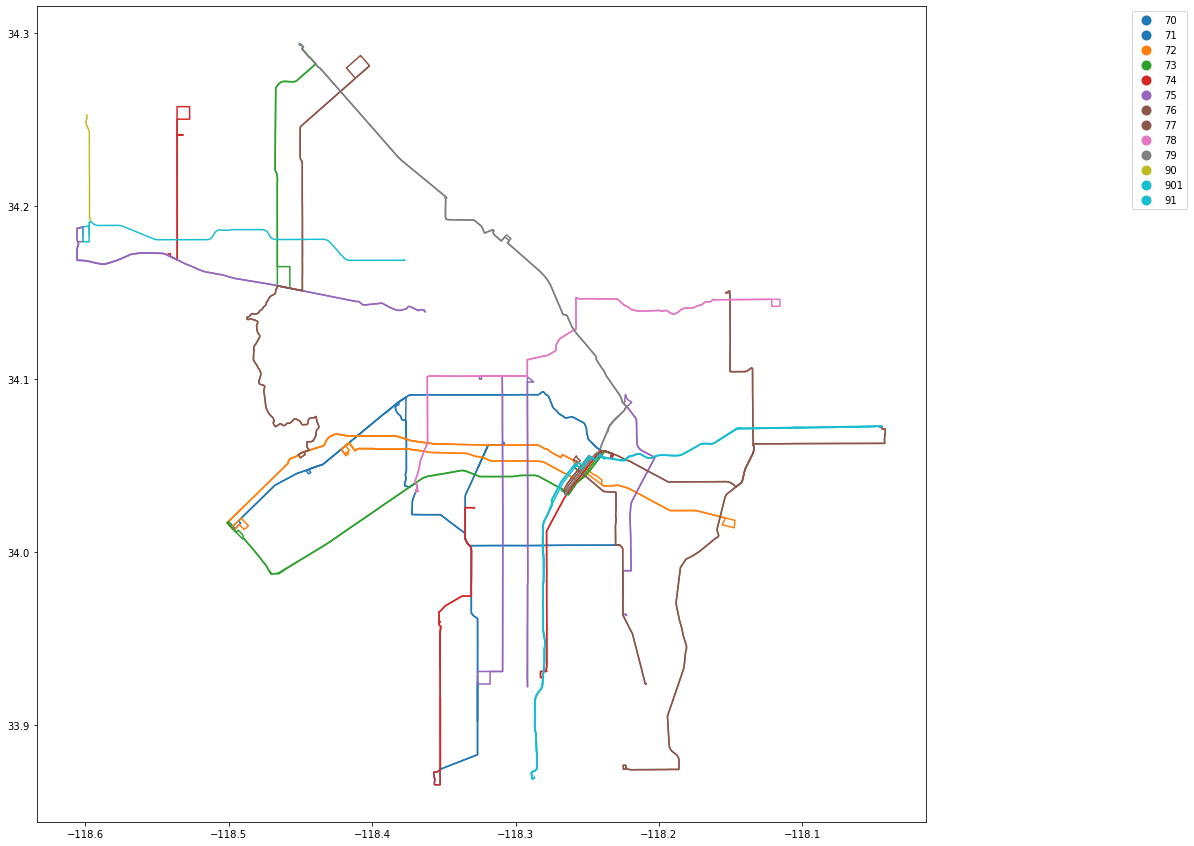

In [32]:
rapid_brt.plot(
            figsize=(20,15),   
            column = 'VAR_ROUTE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
)

Rapid brt of LA.

Text(0.5, 1.0, 'Metro Limted and Expressway')

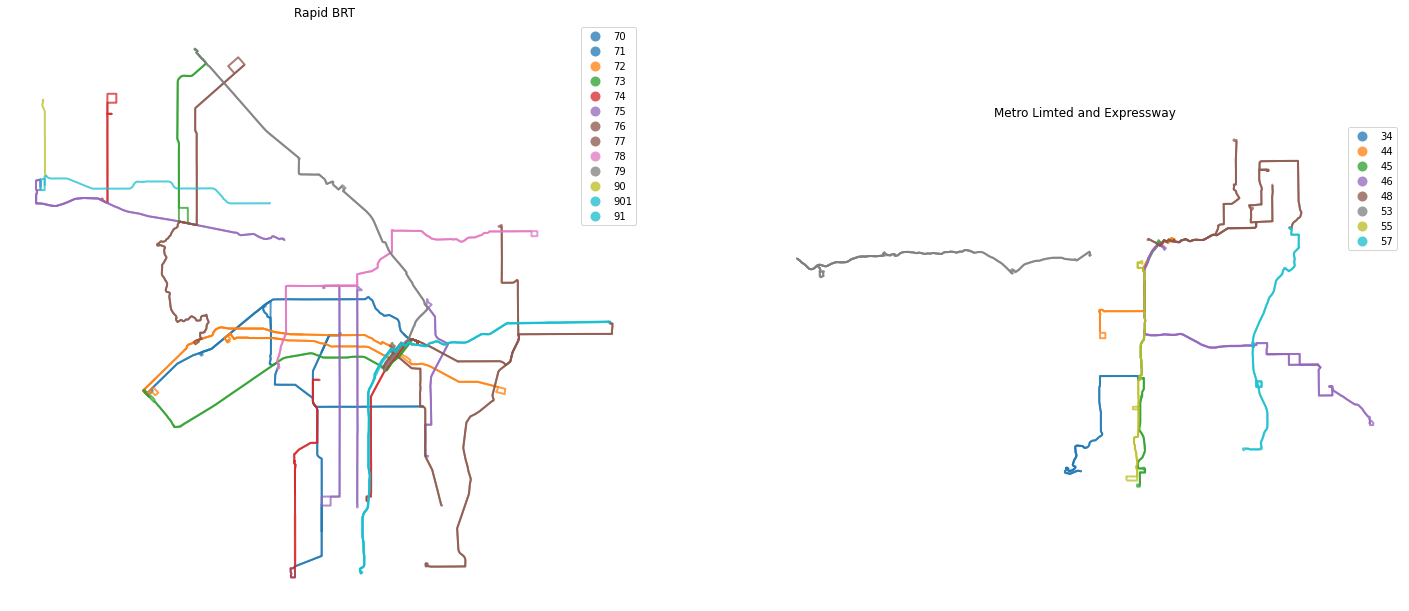

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(25, 20))

# name each subplot
ax3, ax4 = axs

# regular count map on the left
rapid_brt.plot(column='VAR_ROUTE',         
            edgecolor='white', 
            linewidth=2., 
            alpha=.75, 
            ax=ax3,
            legend=True
           )

ax3.axis("off")
ax3.set_title("Rapid BRT")

# spatial lag map on the right
lim_exp.plot(column='VAR_ROUTE', 
            edgecolor='white', 
            linewidth=2., 
            alpha=.75, 
            ax=ax4, 
            legend=True
           )

ax4.axis("off")
ax4.set_title("Metro Limted and Expressway")

<h2> Rail Line Stations 

In [34]:
rail_lines

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (6503030.095 1738033.828)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (6502796.262 1739558.050)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (6504114.567 1743039.068)
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (6504120.152 1745681.179)
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (6503995.170 1752228.119)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Gold,804,0,5,0,None,80417,Del Mar Station,34.141910,-118.148214,Del Mar,6.516819e+06,1.874059e+06,POINT (6516818.973 1874058.989)
79,Gold,804,0,4,0,None,80418,Memorial Park Station,34.148356,-118.147512,Mem Pk,6.517035e+06,1.876404e+06,POINT (6517034.832 1876404.492)
80,Gold,804,0,3,0,None,80419,Lake Station,34.151806,-118.131390,Lake,6.521914e+06,1.877653e+06,POINT (6521914.408 1877653.241)
81,Gold,804,0,2,0,None,80420,Allen Station,34.152417,-118.114348,Allen,6.527071e+06,1.877869e+06,POINT (6527070.744 1877869.293)


In [35]:
type(rail_lines)

geopandas.geodataframe.GeoDataFrame

In [36]:
rail_lines.sample(10)

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
42,Red/Purple,802,805,4,4,None,80211,7th Street / Metro Center Station - Metro Red ...,34.048634,-118.258682,7MC,6.483305e+06,1.840182e+06,POINT (6483305.444 1840181.860)
37,Red,802,0,9,0,None,80206,Vermont / Sunset Station,34.097708,-118.291756,Sunset,6.473338e+06,1.858068e+06,POINT (6473338.369 1858068.185)
24,EXPO,806,0,6,0,None,80127,Expo / Western Station,34.018331,-118.308910,Ex/Wstrn,6.468056e+06,1.829197e+06,POINT (6468056.285 1829197.007)
62,Gold,804,0,21,0,None,80401,Atlantic Station,34.033398,-118.154469,East LA,6.514866e+06,1.834572e+06,POINT (6514865.604 1834572.308)
34,Red,802,0,12,0,None,80203,Hollywood / Highland Station,34.101547,-118.338549,HW/Highlnd,6.459177e+06,1.859510e+06,POINT (6459176.677 1859509.678)
60,Green,803,0,2,0,None,80313,Lakewood Blvd Station,33.913070,-118.140600,Lakewood,6.519006e+06,1.790776e+06,POINT (6519006.383 1790776.264)
70,Gold,804,0,13,0,None,80409,Union Station - Metro Gold Line,34.056061,-118.234759,UnionSta,6.490559e+06,1.842867e+06,POINT (6490558.616 1842866.895)
18,Blue/EXPO,801,806,2,11,None,80121,Pico Station,34.040735,-118.266118,Pico,6.481045e+06,1.837313e+06,POINT (6481045.290 1837313.149)
13,Blue,801,0,7,0,None,80116,Slauson Station,33.988760,-118.243398,Slauson,6.487883e+06,1.818381e+06,POINT (6487882.577 1818381.005)
72,Gold,804,0,11,0,None,80411,Lincoln Heights / Cypress Park Station,34.080949,-118.220429,Linc/Cyp,6.494919e+06,1.851914e+06,POINT (6494919.000 1851914.267)


Going to map rail line stations.

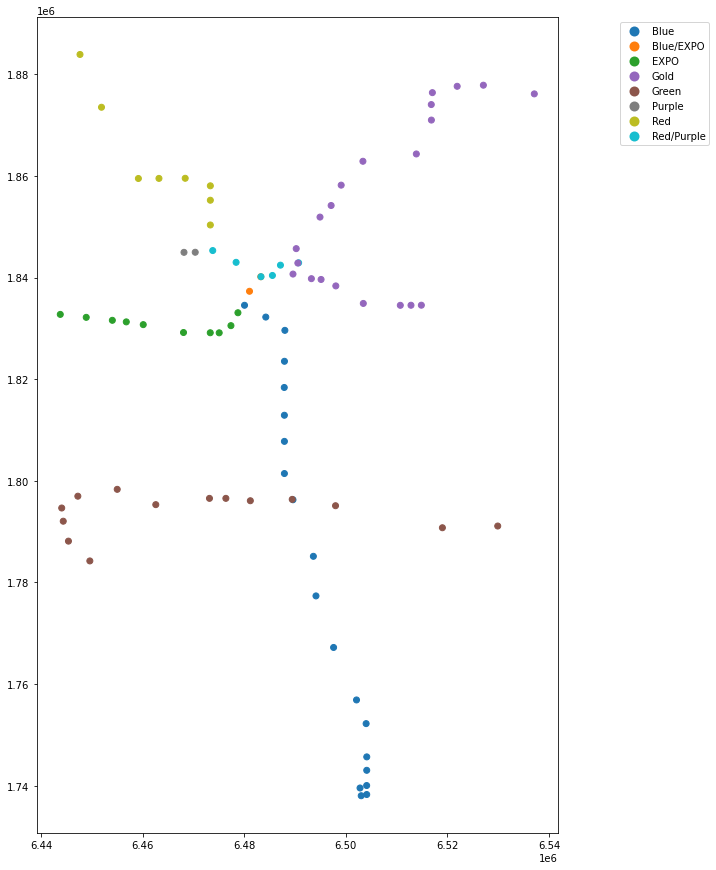

In [37]:
rail_lines.plot(
            figsize=(20,15),   
            column = 'LINE',  
            legend = True,             
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }
)

This gives me an rail stations looks like. However, I wonder how rail lines would allow for a different persepctive. Rail lines come in indvidual shape files. Alternatively, could look at Bus stops, but have had problems downloading those shape files. Will need to address with my partner and during office hours. 